In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_grd = pd.read_csv(filepath_or_buffer="../data/processed/grd.csv", sep=",")
df_grd.head()

,ID GRD,Nombre GRD,Costo resolución en Clínica Privada [MM$]
0,GRD1,Coronario,7.917
1,GRD2,Hepático,3.417
2,GRD3,Respiratorio,2.915
3,GRD4,Renal,6.188
4,GRD5,Neurológico,6.782


In [3]:
df_hospitales = pd.read_csv(filepath_or_buffer="../data/processed/hospitales.csv", sep=",")
df_hospitales.head()

,Nombre Servicio de Salud,Nombre Establecimiento,Área Cuidados Intensivos Adultos,Área Cuidados Intermedios Adulto,Total Camas Críticas,Máxima cantidad de camas a aumetar,Costo de instalar una cama [MM$],Costo de operación anual de una cama [MM$],Costo diario GRD1 [MM$],Costo diario GRD2 [MM$],Costo diario GRD3 [MM$],Costo diario GRD4 [MM$],Costo diario GRD5 [MM$],Costo diario GRD6 [MM$],Costo diario GRD7 [MM$],Costo diario GRD8 [MM$],Costo diario GRD9 [MM$],Costo diario GRD10 [MM$]
0,Metropolitano Norte ...,Complejo Hospitalario San José,11,33,44,10,1407,47.2,0.593,0.509,0.367,0.492,0.524,0.405,0.571,0.474,0.498,0.305
1,Metropolitano Occidente ...,Hospital Adalberto Steeger (Talagante),6,11,17,5,1263,62.1,0.493,0.357,0.429,0.382,0.469,0.386,0.543,0.362,0.564,0.333
2,Metropolitano Occidente ...,Hospital Dr. Félix Bulnes Cerda,3,6,9,5,1310,65.9,0.580,0.325,0.375,0.409,0.561,0.362,0.328,0.314,0.536,0.436
3,Metropolitano Occidente ...,Hospital San Juan de Dios,29,47,76,30,1066,39.2,0.482,0.554,0.564,0.331,0.438,0.509,0.544,0.410,0.441,0.359
4,Metropolitano Occidente ...,Instituto Traumatológico Dr. Teodoro Gebauer,12,6,18,5,1433,55.5,0.407,0.449,0.468,0.433,0.573,0.392,0.409,0.391,0.418,0.334


In [4]:
df_info = pd.read_csv(filepath_or_buffer="../data/processed/info.csv", sep=",")
df_info.head()

,Número de llegada,GRD,Día de llegada,Día de salida,Estadia
0,1,GRD3,1,4,3
1,2,GRD7,1,5,4
2,3,GRD7,1,5,4
3,4,GRD10,1,11,10
4,5,GRD6,1,6,5


In [7]:
# quitar espacios en blanco de las columnas
df_grd.columns = df_grd.columns.str.strip()
df_hospitales.columns = df_hospitales.columns.str.strip()
df_info.columns = df_info.columns.str.strip()



### Error
Observe el siguiente gráfico de barras en el que se muestra la cantidad de pacientes por GRD e indique ¿cuál de las siguientes alternativas no corresponde a una conclusión que se evidencie directamente de la información mostrado en el gráfico?

realmente hay 6 GRD sobre 5 y una de las respuestas dice Hay 5 GRDs que han ingresado más de 6500 pacientes al sistema hospitalario. esa tambien es incorrecta, pero para este quiz la respuesta correcta es El promedio de pacientes por GRD ingresados al sistema es de 6553 pacientes ingresados. porque tampco se puede determinar el promedio en la grafica.

In [9]:
patient_per_grd = df_info.groupby("GRD").size()
patient_per_grd

GRD
GRD1     6587
GRD10    6479
GRD2     6469
GRD3     6597
GRD4     6422
GRD5     6684
GRD6     6502
GRD7     6645
GRD8     6497
GRD9     6652
dtype: int64

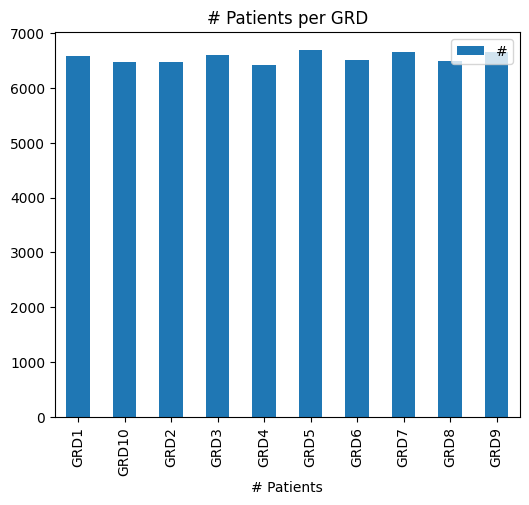

In [23]:
patient_per_grd.plot.bar(
    figsize=(6,5)
)
plt.xlabel("GRD")
plt.xlabel("# Patients")
plt.title("# Patients per GRD")
plt.legend("# Patients", loc='upper right')
plt.show()

Best practice to draw a chart

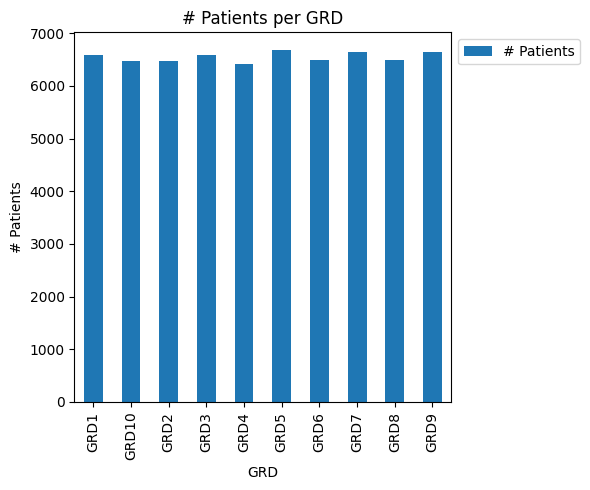

In [34]:
fig, ax = plt.subplots(figsize=(6,5))


patient_per_grd.plot(
    kind="bar",
    ax=ax,
    legend=True,
    label="# Patients"
)

ax.set_xlabel("GRD")
ax.set_ylabel("# Patients")
ax.set_title("# Patients per GRD")

ax.legend(loc="upper left", bbox_to_anchor=(1,1))

plt.tight_layout()
plt.show()


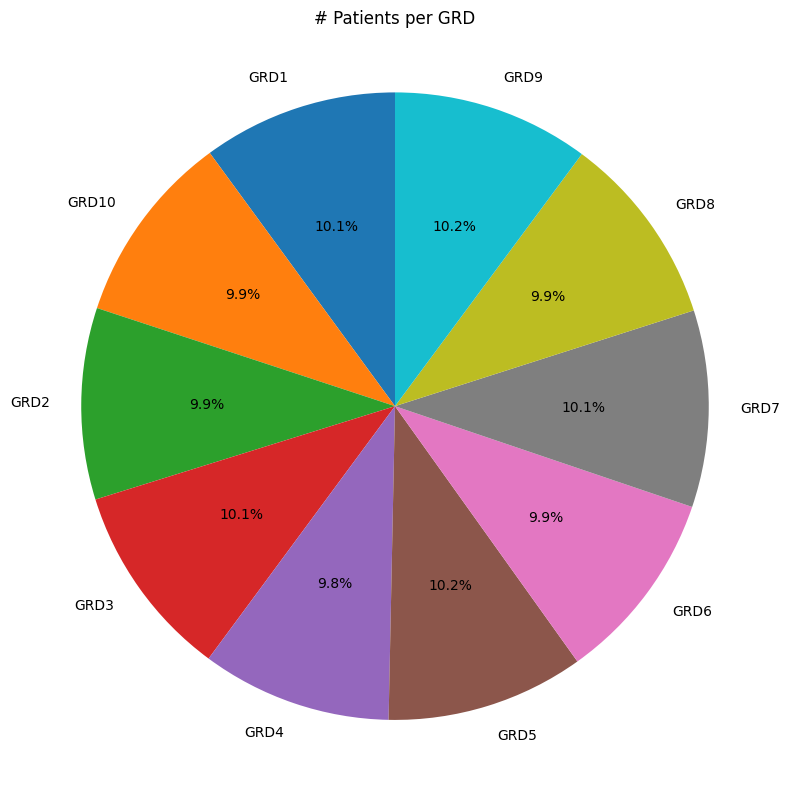

In [36]:
fig, ax = plt.subplots(figsize=(8,8))


ax.pie(patient_per_grd, labels=patient_per_grd.index, autopct='%1.1f%%', startangle=90)

ax.set_title("# Patients per GRD")

ax.axis("equal")

plt.tight_layout()
plt.show()

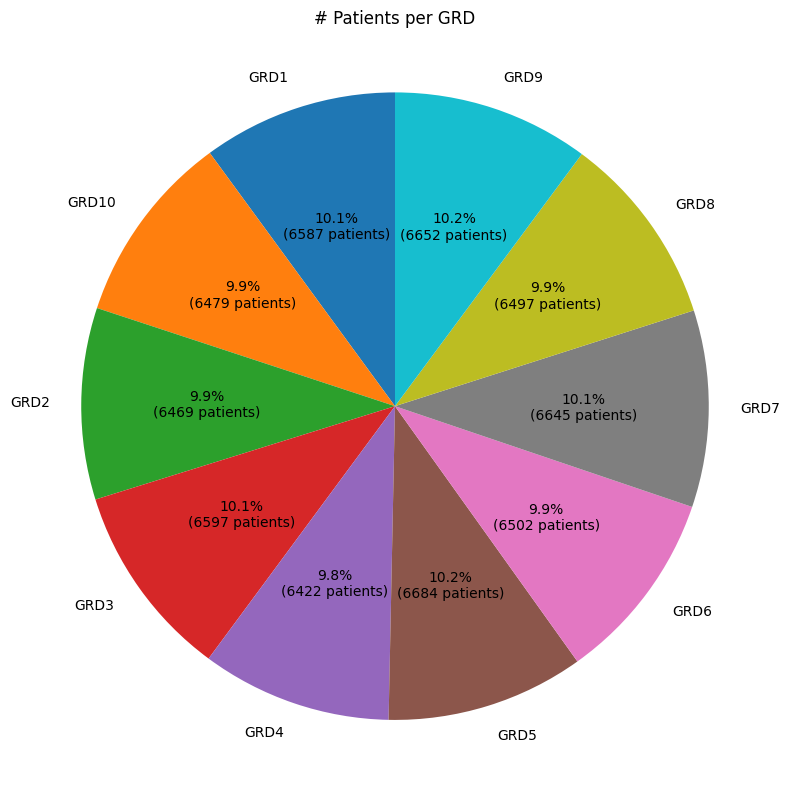

In [37]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        absolute = int(round(pct * total / 100.0))
        return "{:.1f}%\n({:d} patients)".format(pct, absolute)
    return my_autopct

fig, ax = plt.subplots(figsize=(8,8))


ax.pie(
    patient_per_grd,
    labels=patient_per_grd.index,
    autopct=make_autopct(patient_per_grd),
    startangle=90
)

ax.set_title("# Patients per GRD")

ax.axis("equal")

plt.tight_layout()
plt.show()

Cuál de las siguientes alternativas es la manera correcta de escribir, en Matplotlib de Python, los comandos que permiten hacer un gráfico de barras con el costo diario promedio del GRD1 para cada Servicio de Salud.

In [38]:
df_hospitales.head()

,Nombre Servicio de Salud,Nombre Establecimiento,Área Cuidados Intensivos Adultos,Área Cuidados Intermedios Adulto,Total Camas Críticas,Máxima cantidad de camas a aumetar,Costo de instalar una cama [MM$],Costo de operación anual de una cama [MM$],Costo diario GRD1 [MM$],Costo diario GRD2 [MM$],Costo diario GRD3 [MM$],Costo diario GRD4 [MM$],Costo diario GRD5 [MM$],Costo diario GRD6 [MM$],Costo diario GRD7 [MM$],Costo diario GRD8 [MM$],Costo diario GRD9 [MM$],Costo diario GRD10 [MM$]
0,Metropolitano Norte ...,Complejo Hospitalario San José,11,33,44,10,1407,47.2,0.593,0.509,0.367,0.492,0.524,0.405,0.571,0.474,0.498,0.305
1,Metropolitano Occidente ...,Hospital Adalberto Steeger (Talagante),6,11,17,5,1263,62.1,0.493,0.357,0.429,0.382,0.469,0.386,0.543,0.362,0.564,0.333
2,Metropolitano Occidente ...,Hospital Dr. Félix Bulnes Cerda,3,6,9,5,1310,65.9,0.580,0.325,0.375,0.409,0.561,0.362,0.328,0.314,0.536,0.436
3,Metropolitano Occidente ...,Hospital San Juan de Dios,29,47,76,30,1066,39.2,0.482,0.554,0.564,0.331,0.438,0.509,0.544,0.410,0.441,0.359
4,Metropolitano Occidente ...,Instituto Traumatológico Dr. Teodoro Gebauer,12,6,18,5,1433,55.5,0.407,0.449,0.468,0.433,0.573,0.392,0.409,0.391,0.418,0.334


In [40]:
df_hospitales[["Nombre Servicio de Salud", "Costo diario GRD1 [MM$]"]]

,Nombre Servicio de Salud,Costo diario GRD1 [MM$]
0,Metropolitano Norte ...,0.593
1,Metropolitano Occidente ...,0.493
2,Metropolitano Occidente ...,0.580
3,Metropolitano Occidente ...,0.482
4,Metropolitano Occidente ...,0.407
5,Metropolitano Central ...,0.509
6,Metropolitano Central ...,0.468
7,Metropolitano Central ...,0.444
8,Metropolitano Oriente ...,0.444
9,Metropolitano Oriente ...,0.386


In [41]:
gr1_daily_cost_mean_per_service = df_hospitales[["Nombre Servicio de Salud", "Costo diario GRD1 [MM$]"]].groupby("Nombre Servicio de Salud").mean()
gr1_daily_cost_mean_per_service

,Costo diario GRD1 [MM$]
Nombre Servicio de Salud,
Metropolitano Central,0.473667
Metropolitano Norte,0.593000
Metropolitano Occidente,0.490500
Metropolitano Oriente,0.426000
Metropolitano Sur,0.515200
Metropolitano Sur Oriente,0.528750


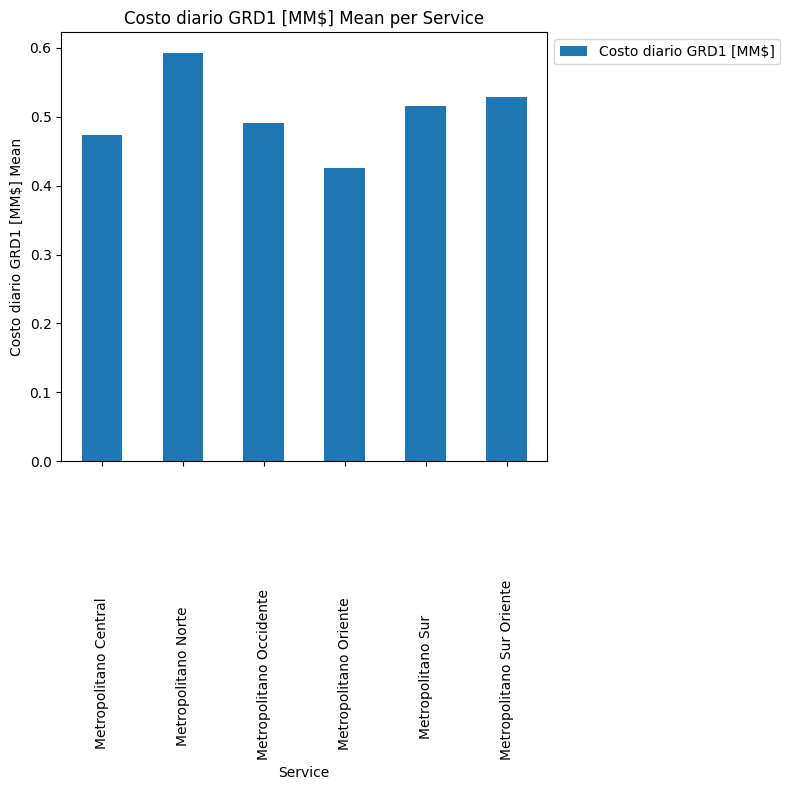

In [44]:
fig, ax = plt.subplots(figsize=(8,8))


gr1_daily_cost_mean_per_service.plot(
    kind="bar",
    ax=ax,
    legend=True,
    label="Costo diario GRD1 [MM$] Mean"
)

ax.set_xlabel("Service")
ax.set_ylabel("Costo diario GRD1 [MM$] Mean")
ax.set_title("Costo diario GRD1 [MM$] Mean per Service")

ax.legend(loc="upper left", bbox_to_anchor=(1,1))

plt.tight_layout()
plt.show()

# Seaborn best practice

/var/folders/5f/8wn5rtw909qbjlpmf_jgrh4h0000gn/T/ipykernel_9246/2385828331.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_patients, x='GRD', y='Patients', ax=ax, palette='viridis')


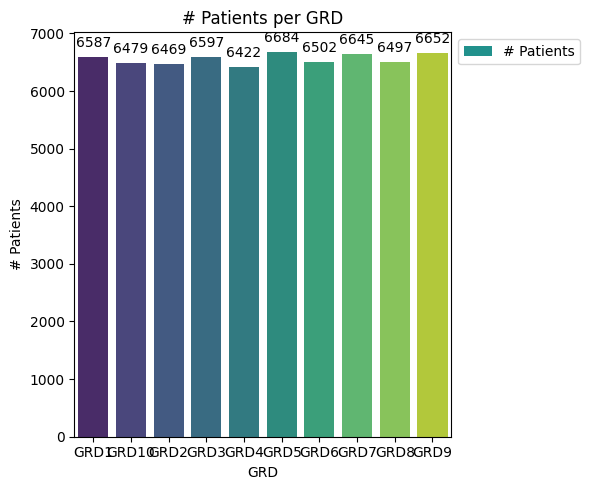

In [45]:
# Convert the Series to a DataFrame (if not already in that format)
df_patients = patient_per_grd.reset_index()
df_patients.columns = ['GRD', 'Patients']

# Create a figure and axis using subplots
fig, ax = plt.subplots(figsize=(6, 5))

# Create the bar plot using seaborn with a chosen palette
sns.barplot(data=df_patients, x='GRD', y='Patients', ax=ax, palette='viridis')

# Set the labels and title using the axis methods
ax.set_xlabel('GRD')
ax.set_ylabel('# Patients')
ax.set_title('# Patients per GRD')

# Optionally, annotate the bars with the patient counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                xytext=(0, 5), textcoords='offset points')

# If you want to add a legend manually (optional for a single variable chart)
# For example, creating a custom legend for the color mapping:
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=sns.color_palette('viridis', n_colors=1)[0],
                         label='# Patients')]
ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout so nothing is cut off
plt.tight_layout()

# Display the plot
plt.show()

# Dashboard

In [54]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure

In [55]:
output_notebook()

Loading BokehJS ...

In [56]:
# Prepare data

df_hospitales.head()

,Nombre Servicio de Salud,Nombre Establecimiento,Área Cuidados Intensivos Adultos,Área Cuidados Intermedios Adulto,Total Camas Críticas,Máxima cantidad de camas a aumetar,Costo de instalar una cama [MM$],Costo de operación anual de una cama [MM$],Costo diario GRD1 [MM$],Costo diario GRD2 [MM$],Costo diario GRD3 [MM$],Costo diario GRD4 [MM$],Costo diario GRD5 [MM$],Costo diario GRD6 [MM$],Costo diario GRD7 [MM$],Costo diario GRD8 [MM$],Costo diario GRD9 [MM$],Costo diario GRD10 [MM$]
0,Metropolitano Norte ...,Complejo Hospitalario San José,11,33,44,10,1407,47.2,0.593,0.509,0.367,0.492,0.524,0.405,0.571,0.474,0.498,0.305
1,Metropolitano Occidente ...,Hospital Adalberto Steeger (Talagante),6,11,17,5,1263,62.1,0.493,0.357,0.429,0.382,0.469,0.386,0.543,0.362,0.564,0.333
2,Metropolitano Occidente ...,Hospital Dr. Félix Bulnes Cerda,3,6,9,5,1310,65.9,0.580,0.325,0.375,0.409,0.561,0.362,0.328,0.314,0.536,0.436
3,Metropolitano Occidente ...,Hospital San Juan de Dios,29,47,76,30,1066,39.2,0.482,0.554,0.564,0.331,0.438,0.509,0.544,0.410,0.441,0.359
4,Metropolitano Occidente ...,Instituto Traumatológico Dr. Teodoro Gebauer,12,6,18,5,1433,55.5,0.407,0.449,0.468,0.433,0.573,0.392,0.409,0.391,0.418,0.334


In [59]:
bed_cost_per_service = df_hospitales[["Nombre Servicio de Salud", "Costo de instalar una cama [MM$]"]].groupby("Nombre Servicio de Salud").mean()
bed_cost_per_service

,Costo de instalar una cama [MM$]
Nombre Servicio de Salud,
Metropolitano Central,1323.666667
Metropolitano Norte,1407.000000
Metropolitano Occidente,1268.000000
Metropolitano Oriente,1202.250000
Metropolitano Sur,1188.200000
Metropolitano Sur Oriente,1122.500000


In [61]:
bed_cost_per_service.index

Index(['Metropolitano Central                             ',
       'Metropolitano Norte                               ',
       'Metropolitano Occidente                           ',
       'Metropolitano Oriente                             ',
       'Metropolitano Sur                                 ',
       'Metropolitano Sur Oriente                         '],
      dtype='object', name='Nombre Servicio de Salud')

In [62]:
bed_cost_per_service.values

array([[1323.66666667],
       [1407.        ],
       [1268.        ],
       [1202.25      ],
       [1188.2       ],
       [1122.5       ]])

Above values is a numpy array but index dont.

In [74]:
import numpy as np

In [83]:
x_values = bed_cost_per_service.index.to_list()
print(type(x_values))
x_values

<class 'list'>


['Metropolitano Central                             ',
 'Metropolitano Norte                               ',
 'Metropolitano Occidente                           ',
 'Metropolitano Oriente                             ',
 'Metropolitano Sur                                 ',
 'Metropolitano Sur Oriente                         ']

In [84]:
y_values = bed_cost_per_service.iloc[:, 0].to_numpy()
print(type(y_values))
y_values

<class 'numpy.ndarray'>


array([1323.66666667, 1407.        , 1268.        , 1202.25      ,
       1188.2       , 1122.5       ])

In [85]:
p = figure(
    title="Costo de camas por servicios",
    x_axis_label="Services",
    y_axis_label="Cost"

)

In [87]:
p.line(x=x_values, y=y_values, legend_label="HS", line_width=2)

show(p)

it did not work